In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df_1 = pd.read_excel("2.11.xlsx", skipfooter = 6, skiprows = range(6)).dropna(axis = 1)
new_keys = ["Municipio"]
tags = ["Total", "Primario", "Secundario"]
new_keys += ["Plantas de tratamiento en operación: " + tag for tag in tags]
new_keys += ["Capacidad instalada (Litros por segundo): " + tag for tag in tags]
new_keys += ["Volumen tratado   (Millones de metros cúbicos): " + tag for tag in tags]
df_1 = df_1.set_axis(new_keys, axis = 1)
df_1 = df_1.drop([0,1,2], axis = 0).reset_index().drop("index", axis = 1)


lista_municipios = []
mun_row = df_1["Municipio"]
indice_ultimo_municipio = 0

for i in range(len(mun_row)):
    municipio = mun_row[i]
    if municipio not in ["Público", "Privado"]:
        indice_ultimo_municipio = i
        lista_municipios.append(municipio)
    else:
        lista_municipios.append(mun_row[indice_ultimo_municipio])

df_1["Municipio_nuevo"] = lista_municipios

for i in range(len(df_1)):
    if df_1["Municipio"].loc[i] not in ["Público", "Privado"]:
        df_1 = df_1.drop(i, axis = 0)
df_1 = df_1.rename(columns = {"Municipio": "Tipo"})
df_1 = df_1.rename(columns = {"Municipio_nuevo": "Municipio"})
key = ["Municipio"] + list(df_1.keys()[:-1])
df_1 = df_1[key].reset_index().drop("index", axis = 1)
df_1

,Municipio,Tipo,Plantas de tratamiento en operación: Total,Plantas de tratamiento en operación: Primario,Plantas de tratamiento en operación: Secundario,Capacidad instalada (Litros por segundo): Total,Capacidad instalada (Litros por segundo): Primario,Capacidad instalada (Litros por segundo): Secundario,Volumen tratado (Millones de metros cúbicos): Total,Volumen tratado (Millones de metros cúbicos): Primario,Volumen tratado (Millones de metros cúbicos): Secundario
0,Acateno,Público,1,0,1,1.8,0,1.8,0.06,0,0.06
1,Acatlán,Privado,1,1,0,1.25,1.25,0,1.25,1.25,0
2,Ahuacatlán,Público,3,0,3,56,0,56,1.77,0,1.77
3,Ajalpan,Privado,2,2,0,6.1,6.1,0,0.1,0.1,0
4,Albino Zertuche,Público,1,0,1,2.2,0,2.2,0.06,0,0.06
...,...,...,...,...,...,...,...,...,...,...,...
118,Zacatlán,Público,3,1,2,101.11,20,81.11,2.9363,0.3784,2.5579
119,Zapotitlán de Méndez,Privado,5,5,0,0.07,0.07,0,0.07,0.07,0
120,Zautla,Público,2,0,2,4.7,0,4.7,0.0694,0,0.0694
121,Zoquiapan,Público,2,0,2,0.9,0,0.9,NS,0,NS


In [3]:
df_2 = pd.read_excel("14_10A_MUNICIPAL_21.xlsx", skipfooter = 5, skiprows = range(6))
df_2 = df_2[df_2["Estimador"] == "Parámetro"]
new_keys_2 = list(df_2.keys()[:4]) + ["Diaria", "Cada tercer día", "Una o dos veces a la semana", "Esporádica", "No especificado"]
new_keys_2
df_2 = df_2.set_axis(new_keys_2, axis=1).reset_index().drop(0, axis = 0).reset_index().drop("level_0", axis = 1)
df_2 = df_2.drop(["index", "Entidad federativa", "Estimador"], axis = 1)
df_2.rename(columns = {"Viviendas particulares habitadas1 con agua entubada2": "Viviendas particulares habitadas con agua entubada"}, inplace = True)
df_2["Municipio"] = [re.sub("[*/?<>/\|:\" '0-9]", "", municipio)for municipio in df_2["Municipio"]]
df_2

,Municipio,Viviendas particulares habitadas con agua entubada,Diaria,Cada tercer día,Una o dos veces a la semana,Esporádica,No especificado
0,Acajete,9359.0,1.175339,4.42355,41.980981,52.067529,0.352602
1,Acateno,1287.0,57.731158,26.495726,10.33411,4.351204,1.087801
2,Acatlán,4579.0,3.887312,19.96069,70.037126,5.678096,0.436777
3,Acatzingo,9930.0,11.883182,10.594159,51.097684,26.062437,0.362538
4,Acteopan,168.0,60.714286,34.52381,4.166667,0.595238,0
...,...,...,...,...,...,...,...
212,Zihuateutla,1490.0,58.590604,21.812081,19.127517,0.268456,0.201342
213,Zinacatepec,3835.0,89.178618,10.039113,0.391134,0,0.391134
214,Zongozotla,1017.0,91.248771,6.882989,0.786627,0.983284,0.098328
215,Zoquiapan,643.0,82.581649,14.930016,1.244168,0.933126,0.311042


In [52]:
data_limpia = pd.merge(df_1, df_2, on = "Municipio", how = "inner")
data_limpia = data_limpia.replace('NS',np.NaN)
data_limpia = data_limpia.dropna().reset_index(drop = True)
data_limpia.to_csv("Datos_limpios.csv")
data_limpia

,Municipio,Tipo,Plantas de tratamiento en operación: Total,Plantas de tratamiento en operación: Primario,Plantas de tratamiento en operación: Secundario,Capacidad instalada (Litros por segundo): Total,Capacidad instalada (Litros por segundo): Primario,Capacidad instalada (Litros por segundo): Secundario,Volumen tratado (Millones de metros cúbicos): Total,Volumen tratado (Millones de metros cúbicos): Primario,Volumen tratado (Millones de metros cúbicos): Secundario,Viviendas particulares habitadas con agua entubada,Diaria,Cada tercer día,Una o dos veces a la semana,Esporádica,No especificado
0,Acateno,Público,1,0,1,1.80,0.00,1.80,0.0600,0.0000,0.0600,1287.0,57.731158,26.495726,10.33411,4.351204,1.087801
1,Acatlán,Privado,1,1,0,1.25,1.25,0.00,1.2500,1.2500,0.0000,4579.0,3.887312,19.96069,70.037126,5.678096,0.436777
2,Ahuacatlán,Público,3,0,3,56.00,0.00,56.00,1.7700,0.0000,1.7700,2763.0,66.775244,18.49439,10.821571,3.764025,0.14477
3,Ajalpan,Privado,2,2,0,6.10,6.10,0.00,0.1000,0.1000,0.0000,9589.0,19.783085,25.195537,39.40974,15.465638,0.146001
4,Aljojuca,Público,2,0,2,8.54,0.00,8.54,0.2693,0.0000,0.2693,1582.0,32.111252,43.994943,19.721871,3.91909,0.252845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Xicotepec,Privado,11,0,11,23.50,0.00,23.50,0.7000,0.0000,0.7000,14824.0,81.995413,12.324609,2.091203,3.494334,0.094441
58,Xochiltepec,Público,1,0,1,5.20,0.00,5.20,0.1640,0.0000,0.1640,723.0,36.514523,58.644537,3.319502,1.521438,0
59,Zacapoaxtla,Público,1,0,1,2.70,0.00,2.70,0.0852,0.0000,0.0852,9470.0,50.369588,29.809926,16.800422,2.893347,0.126716
60,Zacatlán,Público,3,1,2,101.11,20.00,81.11,2.9363,0.3784,2.5579,16219.0,63.752389,24.58228,10.123929,1.276281,0.265121


Visualización

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
columnas = list(data_limpia.columns)
print(columnas)
y_keys = columnas[-5:] + columnas[:2] + columnas[3:5]+ columnas[6:8]+ columnas[9:11]
data_X = data_limpia.drop(y_keys, axis = 1)

['Municipio', 'Tipo', 'Plantas de tratamiento en operación: Total', 'Plantas de tratamiento en operación: Primario', 'Plantas de tratamiento en operación: Secundario', 'Capacidad instalada (Litros por segundo): Total', 'Capacidad instalada (Litros por segundo): Primario', 'Capacidad instalada (Litros por segundo): Secundario', 'Volumen tratado   (Millones de metros cúbicos): Total', 'Volumen tratado   (Millones de metros cúbicos): Primario', 'Volumen tratado   (Millones de metros cúbicos): Secundario', 'Viviendas particulares habitadas con agua entubada', 'Diaria', 'Cada tercer día', 'Una o dos veces a la semana', 'Esporádica', 'No especificado']


In [61]:
data_X.columns = ["Plantas", "Capacidad", "Volúmen", "Viviendas"]

for column in data_X.columns:
    data_X[column] = np.log(data_X[column].astype(float))

data_X


,Plantas,Capacidad,Volúmen,Viviendas
0,0.000000,0.587787,-2.813411,7.160069
1,0.000000,0.223144,0.223144,8.429236
2,1.098612,4.025352,0.570980,7.924072
3,0.693147,1.808289,-2.302585,9.168372
4,0.693147,2.144761,-1.311929,7.366445
...,...,...,...,...
57,2.397895,3.157000,-0.356675,9.604003
58,0.000000,1.648659,-1.807889,6.583409
59,0.000000,0.993252,-2.462754,9.155884
60,1.098612,4.616209,1.077150,9.693939


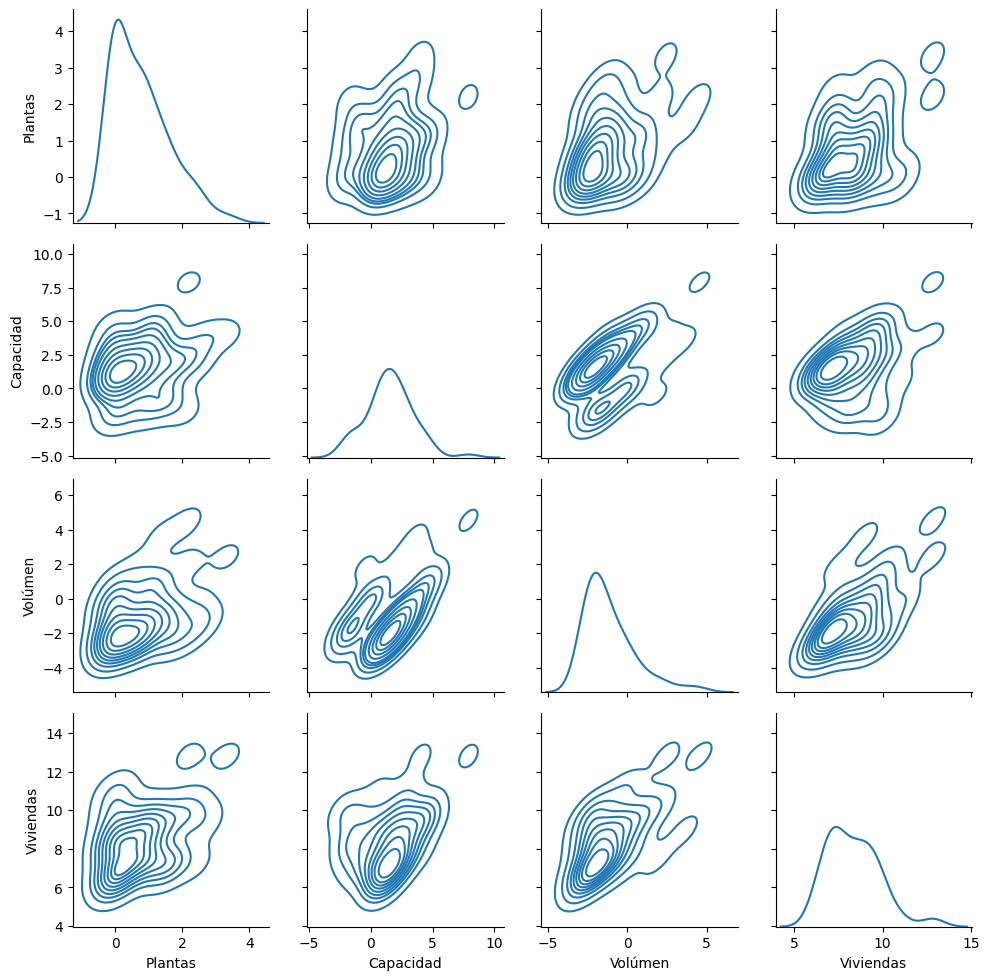

In [69]:
g = sns.PairGrid(data_X)
# g.title("Visualización de la base, escala logarítmica")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot)
pt.savefig("Visualización de la base log.png", format = "png")
plt.show()